## Introduction to time series

Time Series is generally data which is collected over time and is dependent on it.

A series of data points collected in time order is known as a time series. Most of business houses work on time series data to analyze sales number for the next year, website traffic, count of traffic, number of calls received, etc. Data of a time series can be used for forecasting.

Not every data collected with respect to time represents a time series.

- Stock prices time series example

![Image of Time series example](https://s3.amazonaws.com/thinkific/file_uploads/118220/images/865/5c1/2c7/1549344770403.jpg)

- Number of hotel visitors time series example

![Image of Time series example](https://s3.amazonaws.com/thinkific/file_uploads/118220/images/8e3/d40/890/1549344770669.jpg)

## Components of time series

#### Trend : 
Trend is a general direction in which something is developing or changing. So we see an increasing trend in this time series. We can see that the passenger count is increasing with the number of years. Let’s visualize the trend of a time series:

![Image of Time series example](https://s3.amazonaws.com/thinkific/file_uploads/118220/images/7d7/791/f5e/1549344821475.jpg)

Here the red line represents an increasing trend of the time series.

#### Seasonality : 
Another clear pattern can also be seen in the above time series, i.e., the pattern is repeating at regular time interval which is known as the seasonality. Any predictable change or pattern in a time series that recurs or repeats over a specific time period can be said to be seasonality. Let’s visualize the seasonality of the time series:

![Image of Time series example](https://s3.amazonaws.com/thinkific/file_uploads/118220/images/115/9ee/826/1549344821557.jpg)

We can see that the time series is repeating its pattern after every 12 months i.e there is a peak every year during the month of January and a trough every year in the month of September, hence this time series has a seasonality of 12 months.

### Difference between a time series and regression problem

Here you might think that as the target variable is numerical it can be predicted using regression techniques, but a time series problem is different from a regression problem in following ways:

- The main difference is that a time series is time dependent. So the basic assumption of a linear regression model that the observations are independent doesn’t hold in this case.
- Along with an increasing or decreasing trend, most Time Series have some form of seasonality trends,i.e. variations specific to a particular time frame.
So, predicting a time series using regression techniques is not a good approach.

Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

----------------------------

## Problem Statement

Unicorn Investors wants to make an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! The investment would only make sense, if they can get more than 1 Million monthly users within next 18 months. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months. You are provided with traffic data of JetRail since inception in the test file.

You can get the dataset here https://datahack.analyticsvidhya.com/contest/practice-problem-time-series-2/

It is advised to look at the dataset after completing the hypothesis generation part.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set()

from sklearn.metrics import mean_squared_error 
from math import sqrt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import acf, pacf 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

## Import data

In [2]:
train = pd.read_csv('../input_files/train_dataset.csv') 
test = pd.read_csv('../input_files/test_dataset.csv')

In [3]:
train_original = train.copy() 
test_original = test.copy()

In [4]:
print('Train dataset columns:\n'+str(train.columns)+'\n----------------------------------------------------')
print('Test dataset columns:\n'+str(test.columns))

Train dataset columns:
Index(['ID', 'Datetime', 'Count'], dtype='object')
----------------------------------------------------
Test dataset columns:
Index(['ID', 'Datetime'], dtype='object')


In [5]:
print('Train dataset dtypes:\n'+str(train.dtypes)+'\n------------------------')
print('Test dataset dtypes:\n'+str(test.dtypes))

Train dataset dtypes:
ID           int64
Datetime    object
Count        int64
dtype: object
------------------------
Test dataset dtypes:
ID           int64
Datetime    object
dtype: object


In [6]:
print('Train dataset shape:\n'+str(train.shape)+'\n----------------------------')
print('Test dataset shape:\n'+str(test.shape))

Train dataset shape:
(18288, 3)
----------------------------
Test dataset shape:
(5112, 2)


In [7]:
train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M') 

test_original['Datetime'] = pd.to_datetime(test_original.Datetime, format='%d-%m-%Y %H:%M') 
train_original['Datetime'] = pd.to_datetime(train_original.Datetime, format='%d-%m-%Y %H:%M')

In [8]:
for i in (train, test, test_original, train_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['Hour'] = i.Datetime.dt.hour

In [9]:
train['day_of_week'] = train['Datetime'].dt.dayofweek

temp = train['Datetime']

In [10]:
train.head()

,ID,Datetime,Count,year,month,day,Hour,day_of_week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [11]:
train['weekend'] = np.where(train['day_of_week'] > 4, 1, 0)

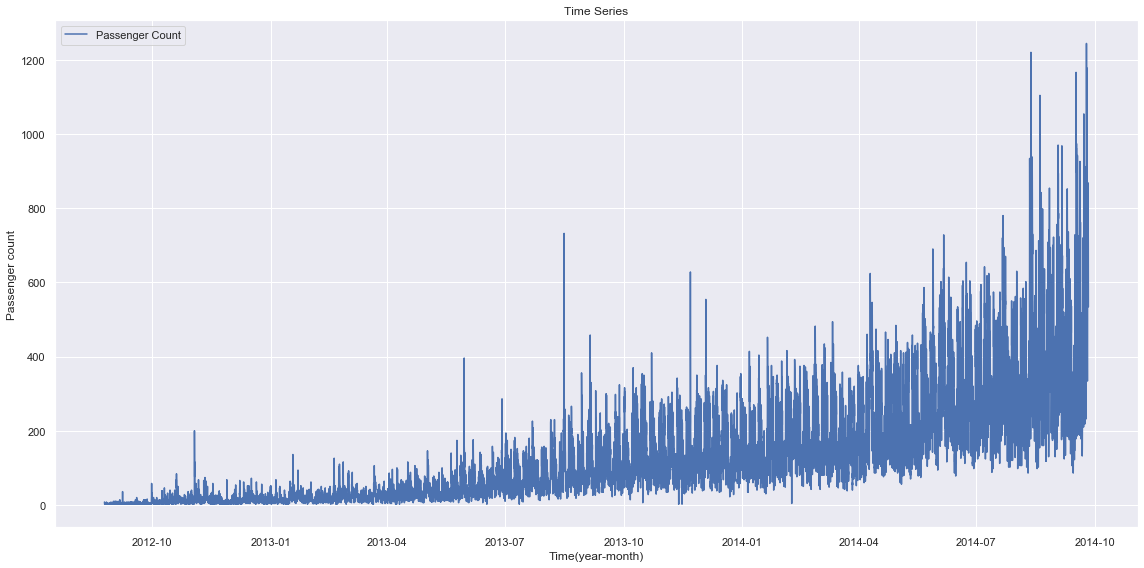

In [12]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis. 
df = train.drop('ID', 1)           # drop ID variable to get only the Datetime on x-axis. 
ts = df['Count'] 

plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count")
plt.tight_layout();
plt.legend(loc='best');

Here we can infer that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time. We can also see that at certain points there is a sudden increase in the number of counts. The possible reason behind this could be that on particular day, due to some event the traffic was high.

In [13]:
df.head()

,Datetime,Count,year,month,day,Hour,day_of_week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [14]:
train.head()

,ID,Datetime,Count,year,month,day,Hour,day_of_week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


## Hypotheses

We will start with the first step, i.e. Hypothesis Generation. Hypothesis Generation is the process of listing out all the possible factors that can affect the outcome.

Hypothesis generation is done before having a look at the data in order to avoid any bias that may result after the observation.

Hypothesis Generation

Hypothesis generation helps us to point out the factors which might affect our dependent variable. Below are some of the hypotheses which I think can affect the passenger count(dependent variable for this time series problem) on the JetRail:

 - There will be an increase in the traffic as the years pass by.

Explanation - Population has a general upward trend with time, so I can expect more people to travel by JetRail. Also, generally companies expand their businesses over time leading to more customers travelling through JetRail.

- The traffic will be high from May to October.

Explanation - Tourist visits generally increases during this time period.

- Traffic on weekdays will be more as compared to weekends/holidays.

Explanation - People will go to office on weekdays and hence the traffic will be more

- Traffic during the peak hours will be high.

Explanation - People will travel to work, college.

We will try to validate each of these hypothesis based on the dataset. Now let’s have a look at the dataset.

- H1: Traffic will increase as the years pass by

In [15]:
df_mean_traffic = train.groupby(['year'], as_index=False)['Count'].mean().rename(index=str, columns={'Count': 'mean_traffic'})

In [16]:
df_mean_traffic

,year,mean_traffic
0,2012,11.282946
1,2013,78.306849
2,2014,283.017102


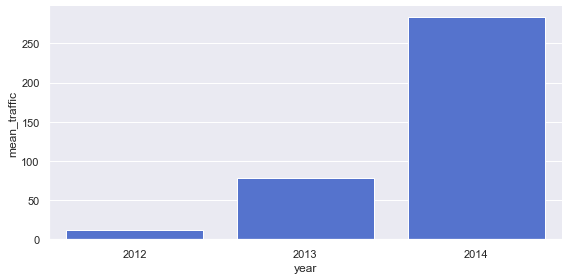

In [17]:
g = sns.catplot(x='year',y="mean_traffic", kind='bar', data=df_mean_traffic, height=4, aspect=2, color='royalblue');

We see an exponential growth in the traffic with respect to year which validates our hypothesis.

- H2: Traffic will be high from May to October

In [18]:
df_mean_traffic_month = train.groupby(['month'], as_index=False)['Count'].mean().rename(index=str, columns={'Count': 'mean_traffic'})

In [19]:
df_mean_traffic_month

,month,mean_traffic
0,1,92.817204
1,2,111.196429
2,3,103.791667
3,4,137.680556
4,5,155.055108
5,6,186.723611
6,7,209.071237
7,8,220.497585
8,9,181.958824
9,10,75.459677


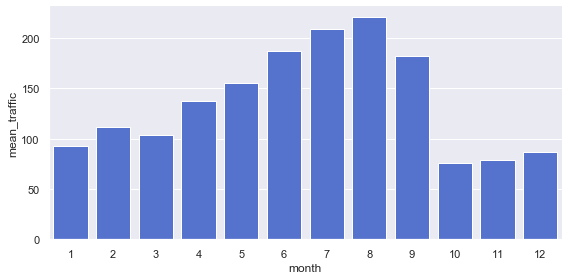

In [20]:
g = sns.catplot(x='month',y="mean_traffic", kind='bar', data=df_mean_traffic_month, height=4, aspect=2, color='royalblue');

In [21]:
df_mean_traffic_year_month = train.groupby(['year','month'], as_index=False)['Count'].mean().rename(index=str, columns={'Count': 'mean_traffic'})

In [22]:
df_mean_traffic_year_month.head()

,year,month,mean_traffic
0,2012,8,2.952381
1,2012,9,4.444444
2,2012,10,10.986559
3,2012,11,15.827778
4,2012,12,15.680108


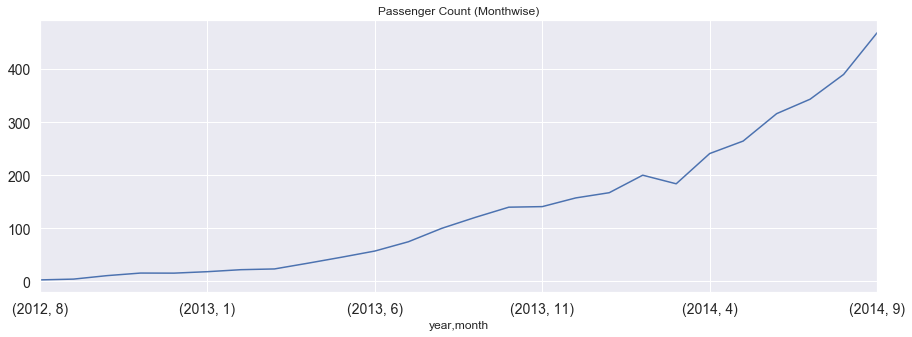

In [23]:
temp = train.groupby(['year', 'month'])['Count'].mean() 
temp.plot(figsize=(15,5), title= 'Passenger Count (Monthwise)', fontsize=14);
# plt.tight_layout()

In [24]:
temp.index[0], temp.index[-1]

((2012, 8), (2014, 9))

- We see that the months 10, 11 and 12 are not present for the year 2014 and the mean value for these months in year 2012 is very low.
- Since there is an increasing trend in our time series, the mean value for rest of the months will be high because of their larger passenger counts in year 2014 and we will get smaller value for these 3 months.

- In the above line plot we can see an increasing trend in monthly passenger count and the growth is approximately exponential.



Let’s look at the daily mean of passenger count.

In [25]:
df_mean_traffic_day = train.groupby(['day'], as_index=False)['Count'].mean().rename(index=str, columns={'Count': 'mean_traffic'})

In [26]:
df_mean_traffic_day.head()

,day,mean_traffic
0,1,129.256667
1,2,133.830000
2,3,135.906667
3,4,142.310000
4,5,149.976667


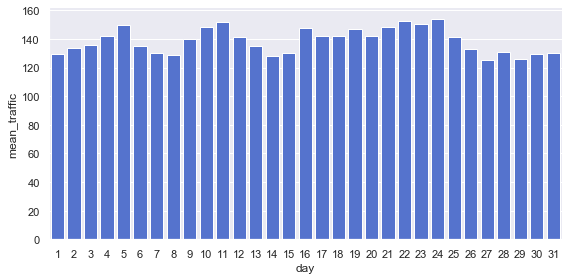

In [27]:
g = sns.catplot(x='day',y="mean_traffic", kind='bar', data=df_mean_traffic_day, height=4, aspect=2, color='royalblue');

We are not getting much insights from day wise count of the passengers.

In [28]:
# train.groupby('day')['Count'].mean().plot.bar()

- H3: Traffic on weekdays will be more

In [29]:
df_mean_traffic_weekend = train.groupby(['weekend'], as_index=False)['Count'].mean().rename(index=str, columns={'Count': 'mean_traffic'})

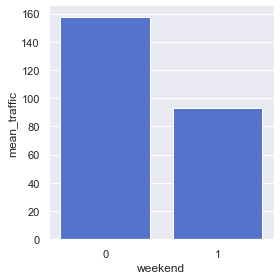

In [30]:
g = sns.catplot(x='weekend',y="mean_traffic", kind='bar', data=df_mean_traffic_weekend, 
                height=4, aspect=1, color='royalblue');

In [31]:
df_mean_traffic_week = train.groupby(['day_of_week'], as_index=False)['Count'].mean().rename(index=str, columns={'Count': 'mean_traffic'})

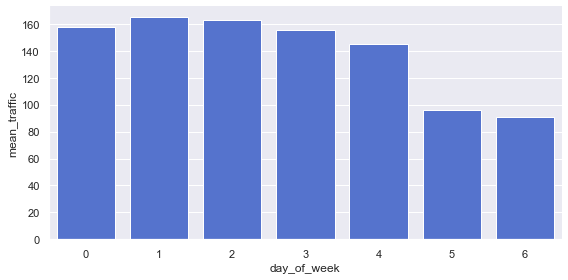

In [32]:
g = sns.catplot(x='day_of_week',y="mean_traffic", kind='bar', data=df_mean_traffic_week, 
                height=4, aspect=2, color='royalblue');

From the above bar plot, we can infer that the passenger count is less for Saturday and Sunday as compared to the other days of the week.

In [33]:
# train.groupby('day of week')['Count'].mean().plot.bar()

- H4: Traffic during the peak hours will be high

In [34]:
df_mean_traffic_hour = train.groupby(['Hour'], as_index=False)['Count'].mean().rename(index=str, columns={'Count': 'mean_traffic'})

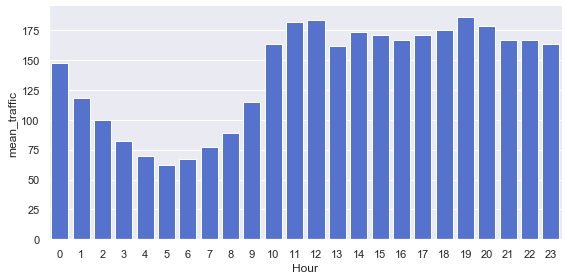

In [35]:
g = sns.catplot(x='Hour',y="mean_traffic", kind='bar', data=df_mean_traffic_hour, 
                height=4, aspect=2, color='royalblue');

It can be inferred that the peak traffic is at 7 PM and then we see a decreasing trend till 5 AM.

After that the passenger count starts increasing again and peaks again between 11AM and 12 Noon.

In [36]:
train = train.drop('ID', axis=1)

In [37]:
train.head()

,Datetime,Count,year,month,day,Hour,day_of_week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


As we have seen that there is a lot of noise in the hourly time series, we will aggregate the hourly time series to daily, weekly, and monthly time series to reduce the noise and make it more stable and hence would be easier for a model to learn.

In [38]:
train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Hourly time series 
hourly = train.resample('H').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()

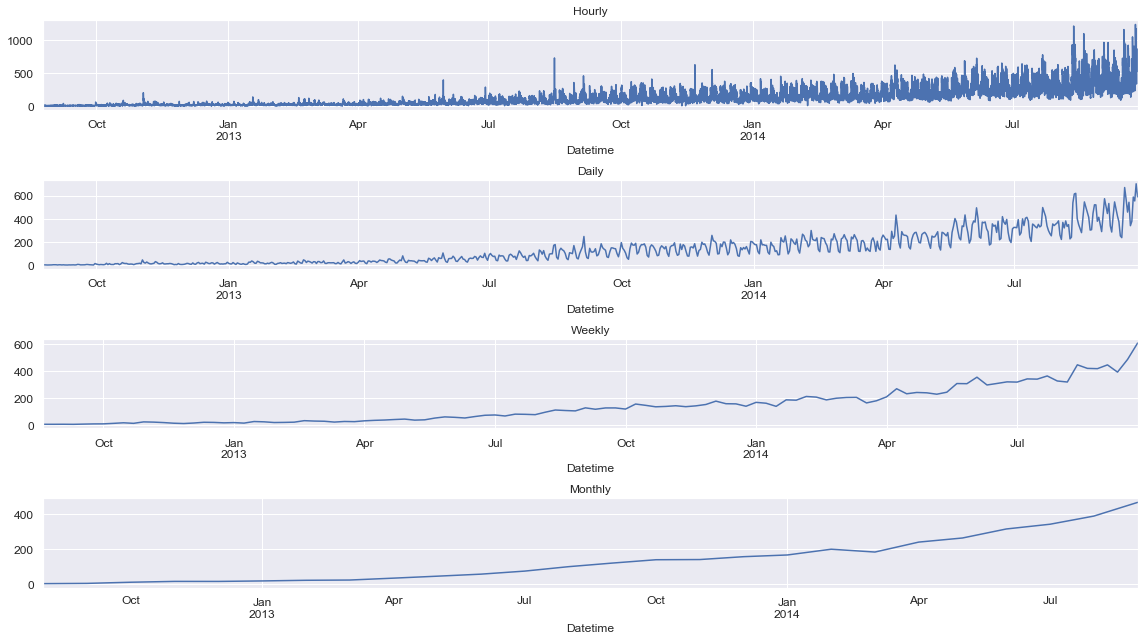

In [39]:
fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(16,9), title= 'Hourly', fontsize=12, ax=axs[0]);
daily.Count.plot(figsize=(16,9), title= 'Daily', fontsize=12, ax=axs[1]);
weekly.Count.plot(figsize=(16,9), title= 'Weekly', fontsize=12, ax=axs[2]); 
monthly.Count.plot(figsize=(16,9), title= 'Monthly', fontsize=12, ax=axs[3]); 
plt.tight_layout();

We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.
But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily and daily to hourly predictions, which will become very expanded process. So, we will work on the daily time series.

In [40]:
test.Timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp  
# Converting to daily mean 
test = test.resample('D').mean() 

train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Converting to daily mean 
train = train.resample('D').mean()

As we have validated all our hypotheses, let’s go ahead and build models for Time Series Forecasting. But before we do that, we will need a dataset (validation) to check the performance and generalisation ability of our model. Below are some of the properties of the dataset required for the purpose.

- The dataset should have the true values of the dependent variable against which the predictions can be checked. Therefore, test dataset cannot be used for the purpose.

- The model should not be trained on the validation dataset. Hence, we cannot train the model on the train dataset and validate on it as well.

So, for the above two reasons, we generally divide the train dataset into two parts. One part is used to train the model and the other part is used as the validation dataset. Now there are multiple ways to divide the train dataset such as Random Division etc. You can look for all of the different validation methods here: https://www.analyticsvidhya.com/blog/2015/11/improve-model-performance-cross-validation-in-python-r/.

For this course, We will be using a time based split explained below.

## Splitting data into training and validation part

Now we will divide our data in train and validation. We will make a model on the train part and predict on the validation part to check the accuracy of our predictions.

NOTE - It is always a good practice to create a validation set that can be used to assess our models locally. If the validation metric (rmse) is changing in proportion to public leaderboard score, this would imply that we have chosen a stable validation technique.

To divide the data into training and validation set, we will take last 3 months as the validation data and rest for training data. We will take only 3 months as the trend will be the most in them. If we take more than 3 months for the validation set, our training set will have less data points as the total duration is of 25 months. So, it will be a good choice to take 3 months for validation set.

The starting date of the dataset is 25-08-2012 as we have seen in the exploration part and the end date is 25-09-2014.

In [41]:
Train=train.loc['2012-08-25':'2014-06-24'] 
valid=train.loc['2014-06-25':'2014-09-25']

In [42]:
Train.head()

,Count,year,month,day,Hour,day_of_week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


In [43]:
valid.head()

,Count,year,month,day,Hour,day_of_week,weekend
Datetime,,,,,,,
2014-06-25,353.666667,2014.0,6.0,25.0,11.5,2.0,0.0
2014-06-26,395.250000,2014.0,6.0,26.0,11.5,3.0,0.0
2014-06-27,282.333333,2014.0,6.0,27.0,11.5,4.0,0.0
2014-06-28,218.250000,2014.0,6.0,28.0,11.5,5.0,1.0
2014-06-29,196.250000,2014.0,6.0,29.0,11.5,6.0,1.0


- We have done time based validation here by selecting the last 3 months for the validation data and rest in the train data. If we would have done it randomly it may work well for the train dataset but will not work effectively on validation dataset.

- Let\'s understand it in this way: If we choose the split randomly it will take some values from the starting and some from the last years as well. It is similar to predicting the old values based on the future values which is not the case in real scenario.

Now we will look at how the train and validation part has been divided.

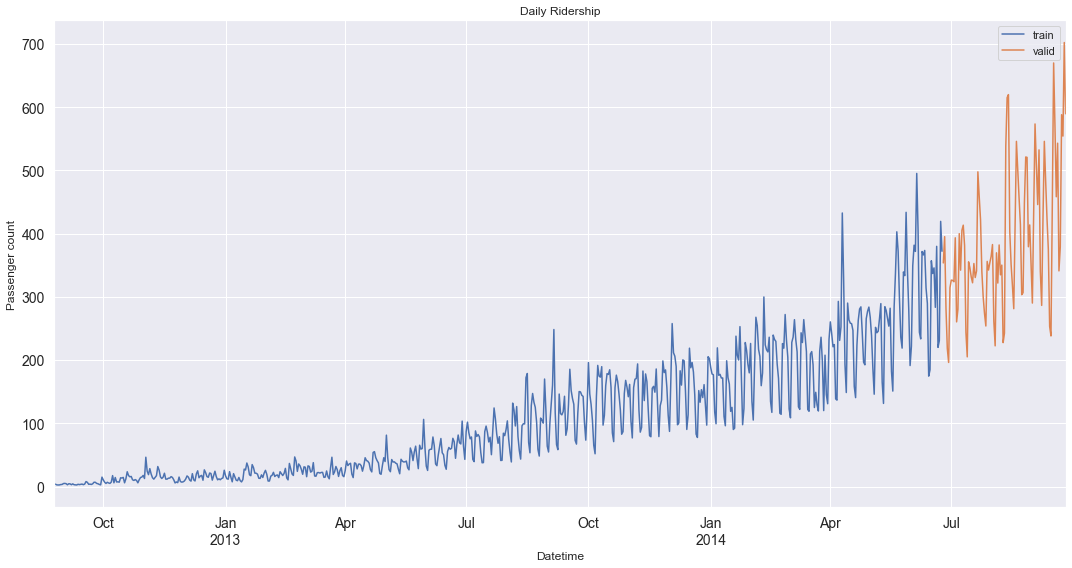

In [44]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') 
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
plt.legend(loc='best'); 
plt.tight_layout();
# plt.show()

Here the blue part represents the train data and the orange part represents the validation data.

We will predict the traffic for the validation part and then visualize how accurate our predictions are. Finally we will make predictions for the test dataset.

## Modeling Techniques

### Naive approach

In this forecasting technique, we assume that the next expected point is equal to the last observed point. So we can expect a straight horizontal line as the prediction. Lets understand it with an example and an image:

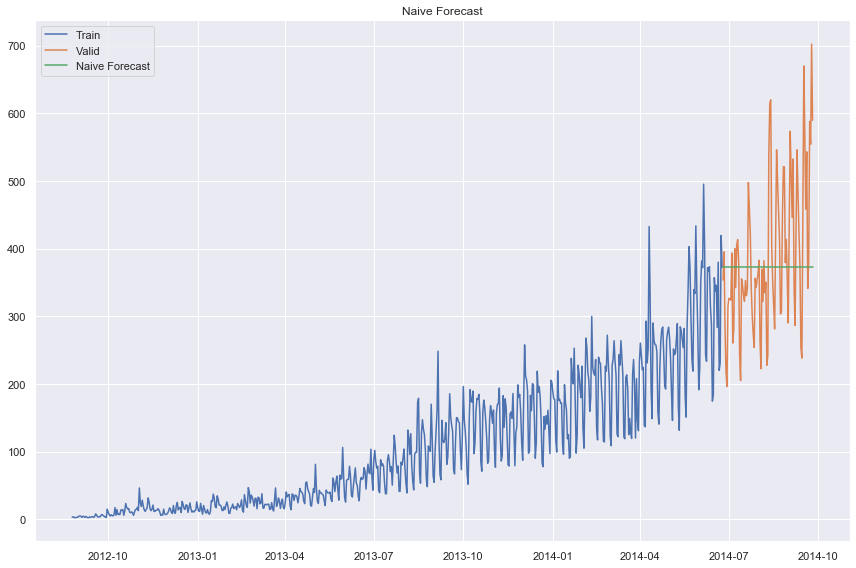

In [45]:
dd = np.asarray(Train.Count) 
y_hat = valid.copy() 
y_hat['naive'] = dd[len(dd)-1]

plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Count'], label='Train') 
plt.plot(valid.index, valid['Count'], label='Valid') 
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast");
plt.tight_layout();

- We can calculate how accurate our predictions are using rmse (Root Mean Square Error).
- rmse is the standard deviation of the residuals.
- Residuals are a measure of how far from the regression line data points are.
- The formula for rmse is:
    
    rmse=sqrt∑i=1N[(predicted−actual)^2/N]
    
![Image of Time series example](https://miro.medium.com/max/966/1*lqDsPkfXPGen32Uem1PTNg.png)

In [46]:
rmse = np.round(sqrt(mean_squared_error(valid.Count, y_hat.naive)), 2)
print(rmse)

111.79


We can infer that this method is not suitable for datasets with high variability. We can reduce the rmse value by adopting different techniques.

### Moving Average

In this technique we will take the average of the passenger counts for last few time periods only.

Lets try the rolling mean for last 10, 20, 50 days and visualize the results.

rolling mean for the last 10 days rmse:
134.24
rolling mean for the last 20 days rmse:
130.45
rolling mean for the last 50 days rmse:
144.19


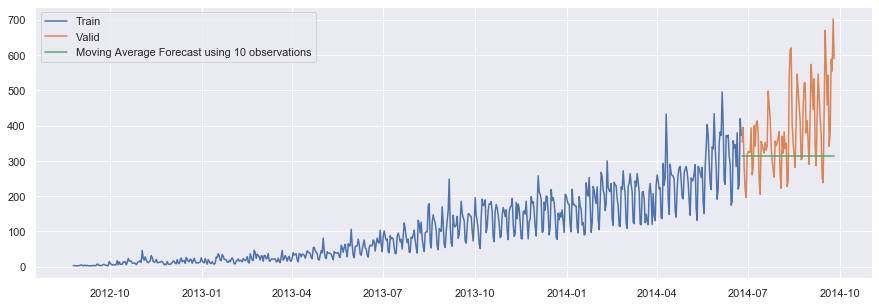

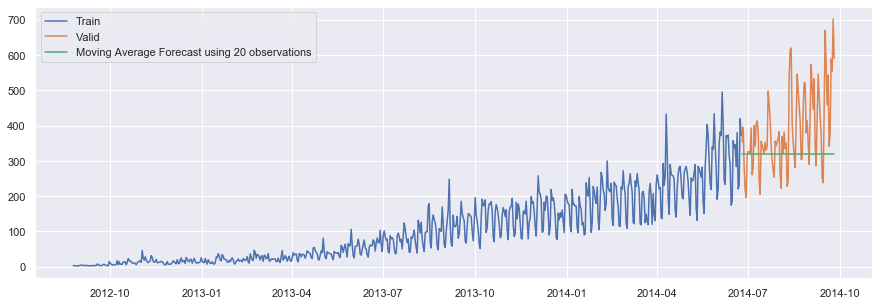

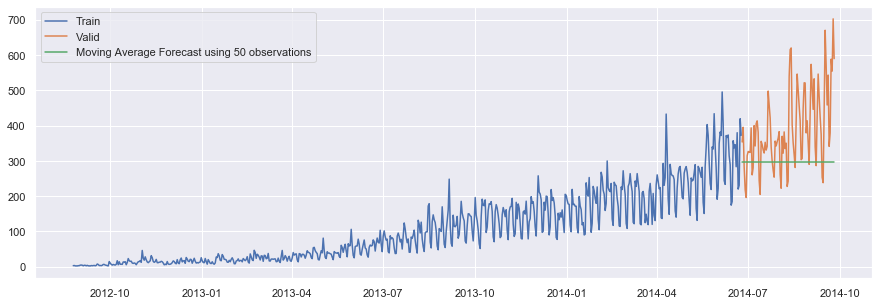

In [47]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations. 

plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best');

rmse = np.round(sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) ,2)
print('rolling mean for the last 10 days rmse:\n'+str(rmse))

 
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] # average of last 20 observations. 

plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best'); 

rmse = np.round(sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) , 2)
print('rolling mean for the last 20 days rmse:\n'+str(rmse))



y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] # average of last 50 observations. 

plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best');

rmse = np.round(sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) , 2)
print('rolling mean for the last 50 days rmse:\n'+str(rmse))

We took the average of last 10, 20 and 50 observations and predicted based on that. This value can be changed in the above code in .rolling().mean() part. We can see that the predictions are getting weaker as we increase the number of observations.

### Simple Exponential Smoothing

- This method is suitable for forecasting data with no clear trend or seasonal patern.
- Forecasts are calculated using weighted averages, where the weights descrease exponentially as observations come from further in the past.
- In this technique, we assign larger weights to more recent observations than to observations from the distant past.

NOTE - If we give the entire weight to the last observed value only, this method will be similar to the naive approach. So, we can say that naive approach is also a simple exponential smoothing technique where the entire weight is given to the last observed value.

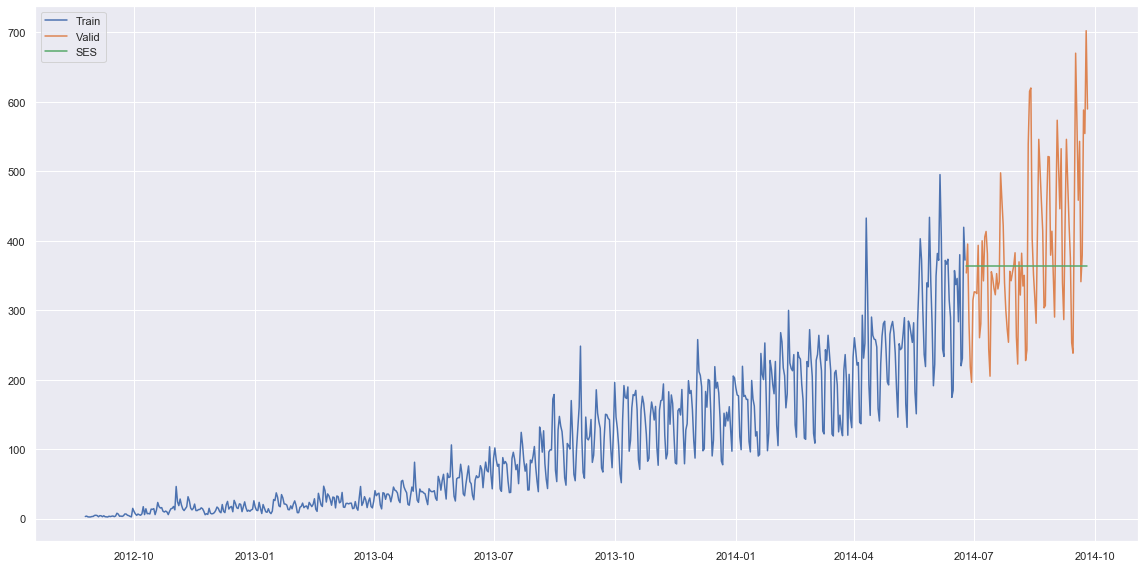

In [48]:
# from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
y_hat_avg = valid.copy() 
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6, optimized=False) 
y_hat_avg['SES'] = fit2.forecast(len(valid)) 

plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best');
plt.tight_layout();

In [49]:
rmse = np.round(sqrt(mean_squared_error(valid.Count, y_hat_avg.SES)), 2)
print(rmse)

113.44


### Holt's Linear Trend

- It is an extension of simple exponential smoothing to allow forecasting of data with a trend.
- This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.

First of all let us visualize the trend, seasonality and error in the series.

We can decompose the time series in four parts.

- Observed, which is the original time series.
- Trend, which shows the trend in the time series, i.e., increasing or decreasing behaviour of the time series.
- Seasonal, which tells us about the seasonality in the time series.
- Residual, which is obtained by removing any trend or seasonality in the time series.

Lets visualize all these parts.

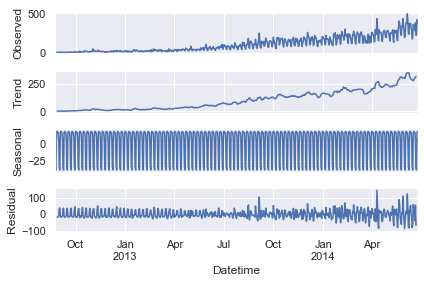

In [50]:
sm.tsa.seasonal_decompose(Train.Count).plot() 
result = sm.tsa.stattools.adfuller(train.Count)

An increasing trend can be seen in the dataset, so now we will make a model based on the trend.

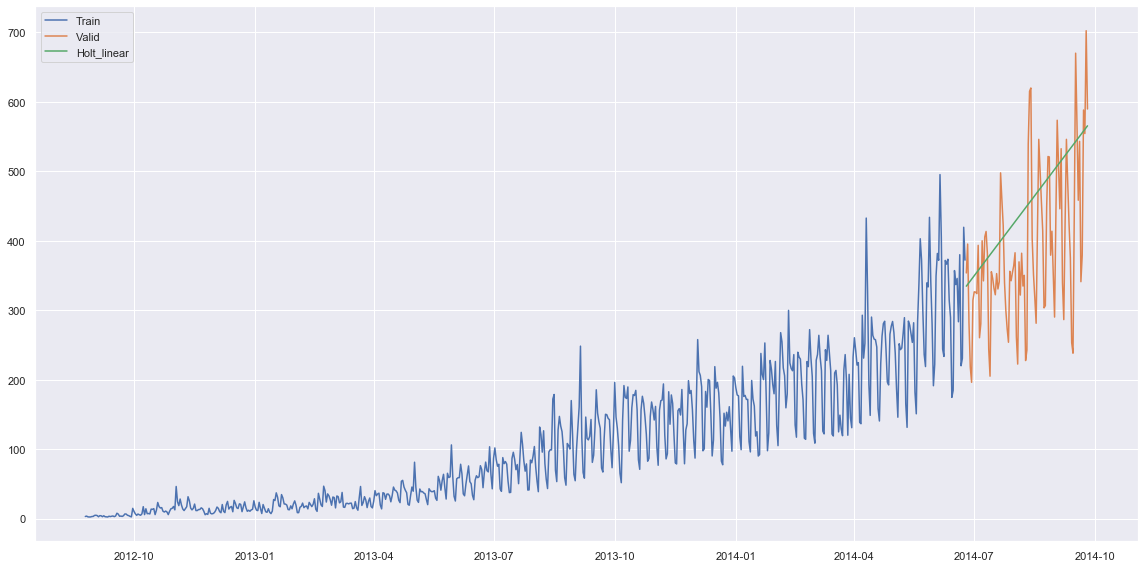

In [51]:
y_hat_avg = valid.copy() 
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level=0.3, smoothing_slope=0.1) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid)) 

plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best');
plt.tight_layout()

We can see an inclined line here as the model has taken into consideration the trend of the time series.

In [52]:
rmse = np.round(sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear)), 2)
print(rmse)

112.94


It can be inferred that the rmse value has decreased.

Now we will be predicting the passenger count for the test dataset using various models.

## Holt’s Linear Trend Model on daily time series

- Now let’s try to make holt’s linear trend model on the daily time series and make predictions on the test dataset.
- We will make predictions based on the daily time series and then will distribute that daily prediction to hourly predictions.
- We have fitted the Holt’s linear trend model on the train dataset and validated it using validation dataset.

Now let’s load the submission file.

In [53]:
submission = pd.read_csv("../input_files/sample_submission.csv")

We only need ID and corresponding Count for the final submission.

Let’s make prediction for the test dataset.

In [54]:
predict = fit1.forecast(len(test))

Let’s save these predictions in test file in a new column.

In [55]:
test['prediction'] = predict

In [56]:
test

,ID,year,month,day,Hour,prediction
Datetime,,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5,334.650767
2014-09-27,18323.5,2014.0,9.0,27.0,11.5,337.159011
2014-09-28,18347.5,2014.0,9.0,28.0,11.5,339.667256
2014-09-29,18371.5,2014.0,9.0,29.0,11.5,342.175500
2014-09-30,18395.5,2014.0,9.0,30.0,11.5,344.683745
...,...,...,...,...,...,...
2015-04-22,23291.5,2015.0,4.0,22.0,11.5,856.365605
2015-04-23,23315.5,2015.0,4.0,23.0,11.5,858.873849
2015-04-24,23339.5,2015.0,4.0,24.0,11.5,861.382094


In [57]:
train_original.head()

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


Remember this is the daily predictions. We have to convert these predictions to hourly basis. * To do so we will first calculate the ratio of passenger count for each hour of every day. * Then we will find the average ratio of passenger count for every hour and we will get 24 ratios. * Then to calculate the hourly predictions we will multiply the daily prediction with the hourly ratio.

In [58]:
# Calculating the hourly ratio of count 
train_original['ratio'] = train_original['Count'] / train_original['Count'].sum()

In [59]:
train_original.head()

,ID,Datetime,Count,year,month,day,Hour,ratio
0,0,2012-08-25 00:00:00,8,2012,8,25,0,3.148037e-06
1,1,2012-08-25 01:00:00,2,2012,8,25,1,7.870093e-07
2,2,2012-08-25 02:00:00,6,2012,8,25,2,2.361028e-06
3,3,2012-08-25 03:00:00,2,2012,8,25,3,7.870093e-07
4,4,2012-08-25 04:00:00,2,2012,8,25,4,7.870093e-07


In [60]:
# Grouping the hourly ratio 
temp = train_original.groupby(['Hour'])['ratio'].sum() 

In [61]:
temp.head()

Hour
0    0.044287
1    0.035343
2    0.029911
3    0.024714
4    0.020802
Name: ratio, dtype: float64

In [62]:
# Groupby to csv format 
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('../output_files/GROUPby.csv')

In [63]:
temp2 = pd.read_csv("../output_files/GROUPby.csv") 
temp2 = temp2.drop('Hour.1',1) 

In [64]:
temp2.head()

,Hour,ratio
0,0,0.044287
1,1,0.035343
2,2,0.029911
3,3,0.024714
4,4,0.020802


In [65]:
test.head()

,ID,year,month,day,Hour,prediction
Datetime,,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5,334.650767
2014-09-27,18323.5,2014.0,9.0,27.0,11.5,337.159011
2014-09-28,18347.5,2014.0,9.0,28.0,11.5,339.667256
2014-09-29,18371.5,2014.0,9.0,29.0,11.5,342.175500
2014-09-30,18395.5,2014.0,9.0,30.0,11.5,344.683745


In [66]:
test_original.head()

,ID,Datetime,year,month,day,Hour
0,18288,2014-09-26 00:00:00,2014,9,26,0
1,18289,2014-09-26 01:00:00,2014,9,26,1
2,18290,2014-09-26 02:00:00,2014,9,26,2
3,18291,2014-09-26 03:00:00,2014,9,26,3
4,18292,2014-09-26 04:00:00,2014,9,26,4


In [67]:
# Merge Test and test_original on day, month and year 
merge = pd.merge(test, test_original, on=('day', 'month', 'year'), how='left') 
merge['Hour'] = merge['Hour_y'] 
merge = merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1) 
# Predicting by merging merge and temp2 
prediction = pd.merge(merge, temp2, on='Hour', how='left') 

In [68]:
prediction.head()

,ID_x,day,prediction,ID_y,Hour,ratio
0,18299.5,26.0,334.650767,18288,0,0.044287
1,18299.5,26.0,334.650767,18289,1,0.035343
2,18299.5,26.0,334.650767,18290,2,0.029911
3,18299.5,26.0,334.650767,18291,3,0.024714
4,18299.5,26.0,334.650767,18292,4,0.020802


In [69]:
# Converting the ratio to the original scale 
prediction['Count'] = prediction['prediction'] * prediction['ratio'] * 24 
prediction['ID'] = prediction['ID_y']

In [70]:
prediction.head()

,ID_x,day,prediction,ID_y,Hour,ratio,Count,ID
0,18299.5,26.0,334.650767,18288,0,0.044287,355.692974,18288
1,18299.5,26.0,334.650767,18289,1,0.035343,283.861602,18289
2,18299.5,26.0,334.650767,18290,2,0.029911,240.234347,18290
3,18299.5,26.0,334.650767,18291,3,0.024714,198.497058,18291
4,18299.5,26.0,334.650767,18292,4,0.020802,167.075574,18292


Let’s drop all other features from the submission file and keep ID and Count only.

In [71]:
submission=prediction.drop(['ID_x', 'day', 'ID_y','prediction','Hour', 'ratio'],axis=1) 
# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('../output_files/Holt linear.csv')

## Holt Winter’s model on daily time series

- Datasets which show a similar set of pattern after fixed intervals of a time period suffer from seasonality.

- The above mentioned models don’t take into account the seasonality of the dataset while forecasting. Hence we need a method that takes into account both trend and seasonality to forecast future values.

- One such algorithm that we can use in such a scenario is Holt’s Winter method. The idea behind Holt’s Winter is to apply exponential smoothing to the seasonal components in addition to level and trend.

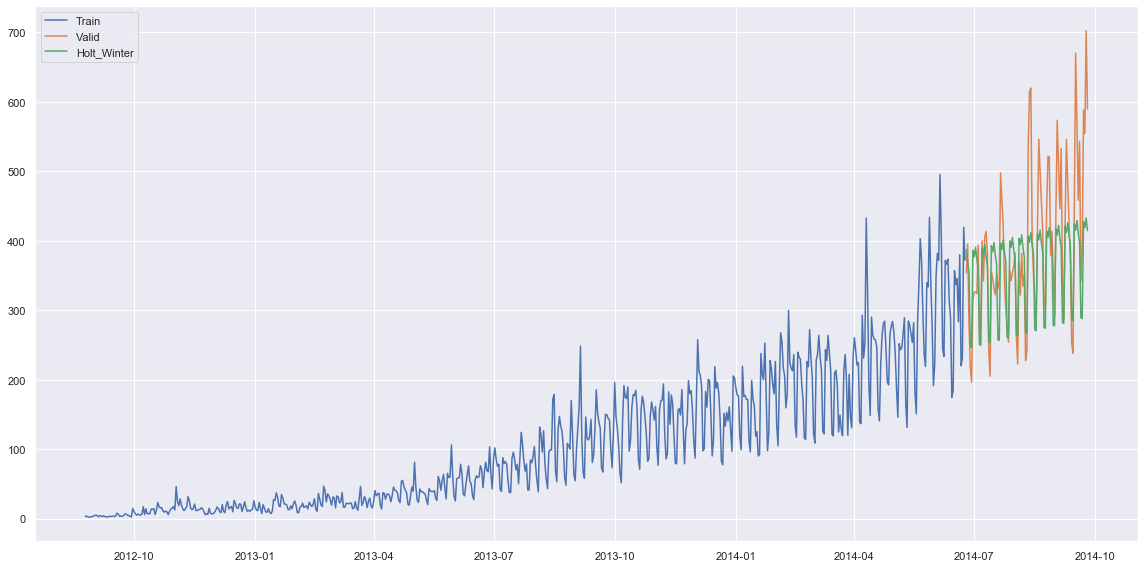

In [72]:
y_hat_avg = valid.copy() 
fit1 = ExponentialSmoothing(np.asarray(Train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add').fit() 
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid)) 

plt.figure(figsize=(16,8)) 
plt.plot( Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter') 
plt.legend(loc='best'); 
plt.tight_layout();

In [73]:
rmse = np.round(sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter)), 2)
print(rmse)

82.38


We can see that the rmse value has reduced a lot from this method. Let’s forecast the Counts for the entire length of the Test dataset.

In [74]:
predict = fit1.forecast(len(test))

Now we will convert these daily passenger count into hourly passenger count using the same approach which we followed above.

In [75]:
test['prediction'] = predict

In [76]:
# Merge Test and test_original on day, month and year 
merge=pd.merge(test, test_original, on=('day','month', 'year'), how='left') 
merge['Hour'] = merge['Hour_y'] 
merge = merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1) 

In [77]:
# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left')

In [78]:
# Converting the ratio to the original scale 
prediction['Count'] = prediction['prediction'] * prediction['ratio'] * 24

Let’s drop all features other than ID and Count

In [79]:
prediction['ID'] = prediction['ID_y'] 
submission = prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1)

In [80]:
# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('../output_files/Holt winters.csv')

## ARIMA

### Introduction
- ARIMA stands for Auto Regression Integrated Moving Average. 
- ARIMA is one of the most widely used forecasting method for univariate time series data forecasting.
- Although the method can handle data with a trend, it does not support time series with a seasonal component. An extension to ARIMA that supports the direct modeling of the seasonal component of the series is called SARIMA.
- ARIMA expects data that is either not seasonal or has the seasonal component removed, e.g. seasonally adjusted via methods such as seasonal differencing.

It is specified by three ordered parameters (p,d,q).

- Here p is the order of the autoregressive model (number of time lags)
- d is the degree of differencing (number of times the data have had past values subtracted)
- q is the order of moving average model.

The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation.

#### What is a stationary time series?
There are three basic criterion for a series to be classified as stationary series :

- The mean of the time series should not be a function of time. It should be constant.
- The variance of the time series should not be a function of time.
- The covariance of the ith term and the (i+m)th term should not be a function of time.

#### Why do we have to make the time series stationary?


We make the series stationary to make the variables independent. Variables can be dependent in various ways, but can only be independent in one way. So, we will get more information when they are independent. Hence the time series must be stationary.

If the time series is not stationary, firstly we have to make it stationary. For doing so, we need to remove the trend and seasonality from the data. To learn more about stationarity you can refer this article: https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/

### Parameter tuning for ARIMA model
First of all we have to make sure that the time series is stationary. If the series is not stationary, we will make it stationary.
#### Stationarity Check
- We use Dickey Fuller test to check the stationarity of the series.
- The intuition behind this test is that it determines how strongly a time series is defined by a trend.
- The null hypothesis of the test is that time series is not stationary (has some time-dependent structure).
- The alternative hypothesis (rejecting the null hypothesis) is that the time series is stationary.

The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

We interpret this result using the Test Statistics and critical value. If the Test Statistics is smaller than critical value, it suggests we reject the null hypothesis (stationary), otherwise a greater Test Statistics suggests we accept the null hypothesis (non-stationary).

Let’s make a function which we can use to calculate the results of Dickey-Fuller test.

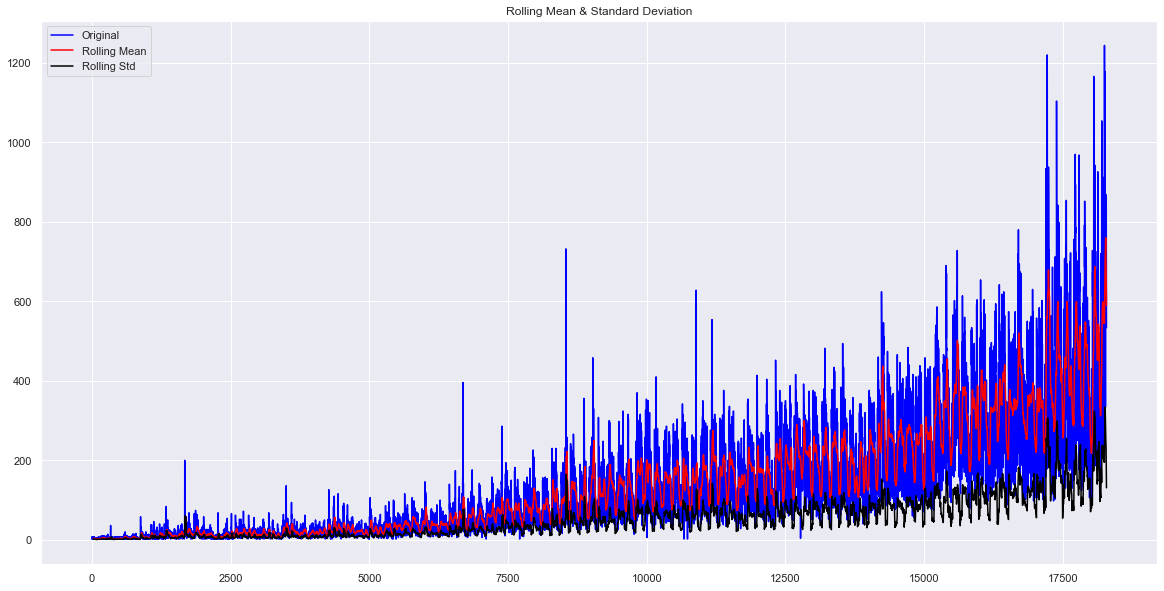

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [81]:
# from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
        #Determing rolling statistics
    rolmean = timeseries.rolling(24).mean() # 24 hours on each day
    rolstd = timeseries.rolling(24).std()
        #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
        #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10
test_stationarity(train_original['Count'])

The statistics shows that the time series is stationary as Test Statistic < Critical value but we can see an increasing trend in the data. So, firstly we will try to make the data more stationary. For doing so, we need to remove the trend and seasonality from the data.

#### Removing trend
- A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear.
- We see an increasing trend in the data so we can apply transformation which penalizes higher values more than smaller ones, for example log transformation.
- We will take rolling average here to remove the trend. We will take the window size of 24 based on the fact that each day has 24 hours.

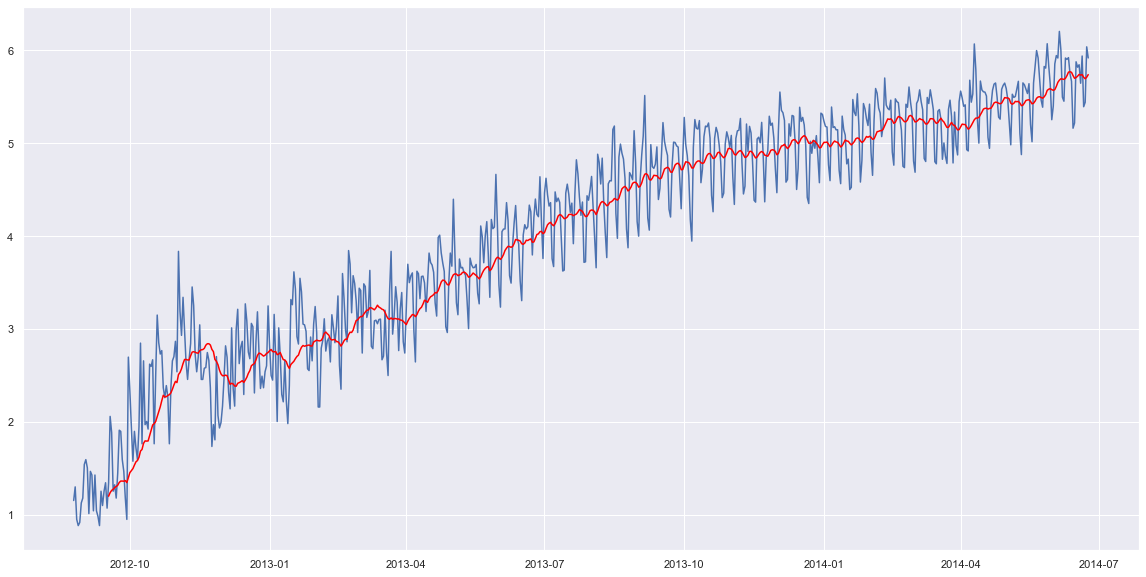

In [82]:
Train_log = np.log(Train['Count']) 
valid_log = np.log(valid['Count'])
moving_avg = Train_log.rolling(24).mean()

plt.plot(Train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

So we can observe an increasing trend. Now we will remove this increasing trend to make our time series stationary.

In [83]:
train_log_moving_avg_diff = Train_log - moving_avg

Since we took the average of 24 values, rolling mean is not defined for the first 23 values. So let’s drop those null values.

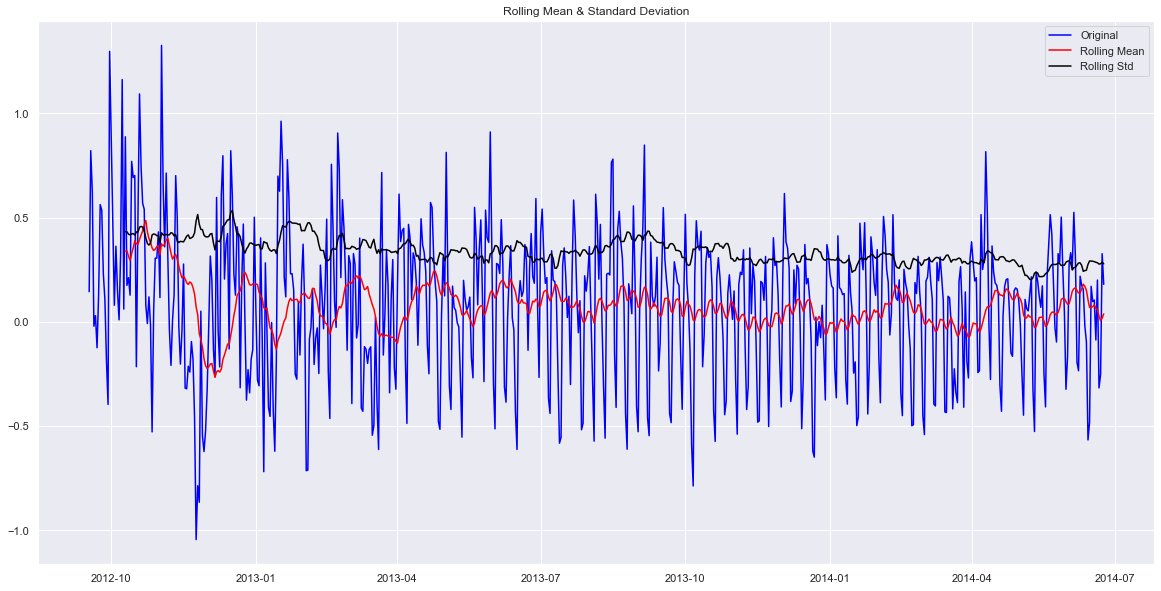

Results of Dickey-Fuller Test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [84]:
train_log_moving_avg_diff.dropna(inplace = True) 
test_stationarity(train_log_moving_avg_diff)

We can see that the Test Statistic is very smaller as compared to the Critical Value. So, we can be confident that the trend is almost removed.

Let’s now stabilize the mean of the time series which is also a requirement for a stationary time series.

- Differencing can help to make the series stable and eliminate the trend.

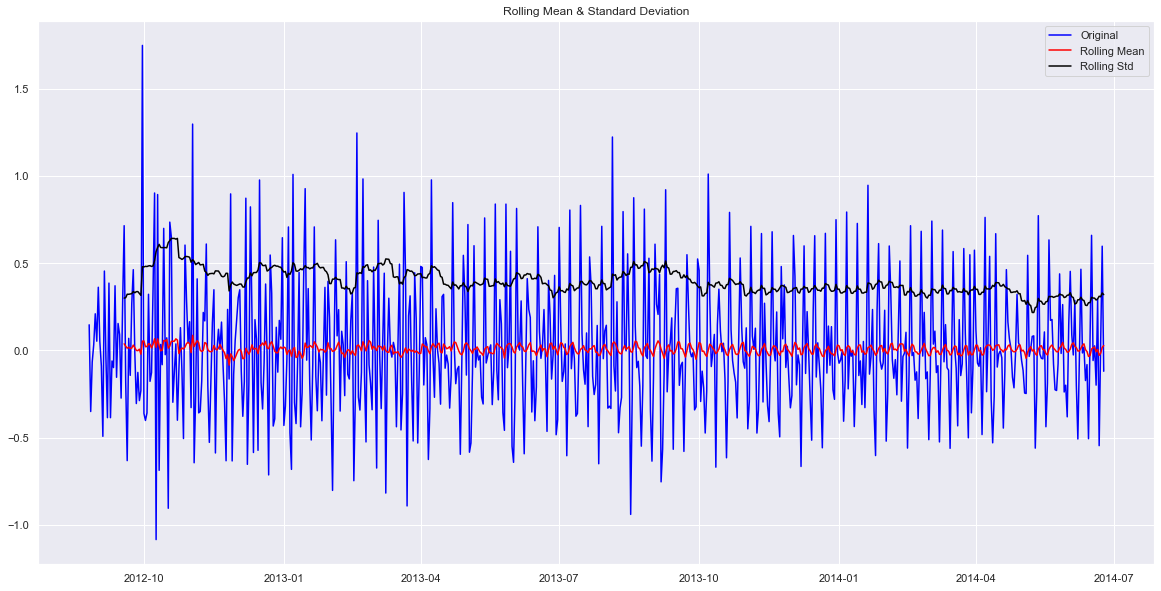

Results of Dickey-Fuller Test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [85]:
train_log_diff = Train_log - Train_log.shift(1) 
test_stationarity(train_log_diff.dropna())

Now we will decompose the time series into trend and seasonality and will get the residual which is the random variation in the series.

#### Removing Seasonality
- By seasonality, we mean periodic fluctuations. A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week).
- Seasonality is always of a fixed and known period.
- We will use seasonal decompose to decompose the time series into trend, seasonality and residuals.

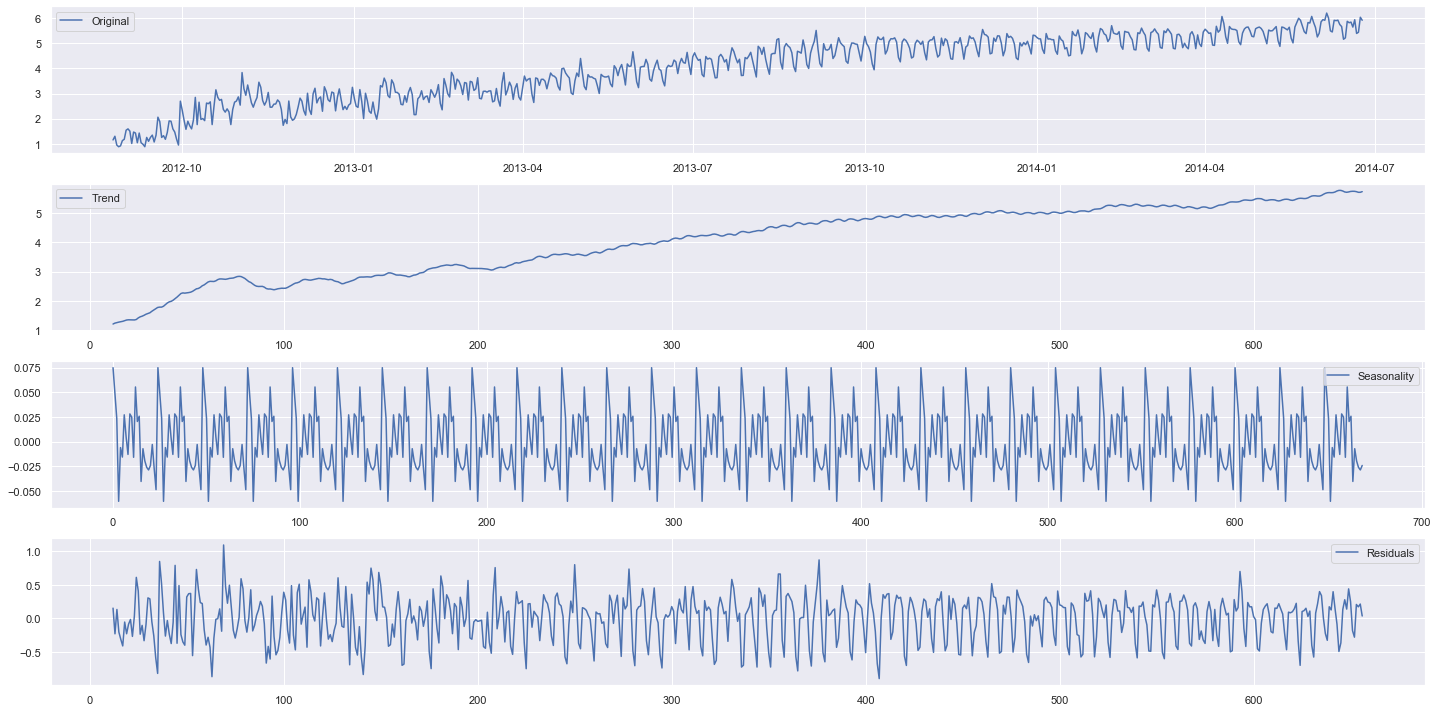

In [86]:
# from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24) 

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

plt.subplot(411) 
plt.plot(Train_log, label='Original') 
plt.legend(loc='best')

plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best')

plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 

plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 

plt.tight_layout() 
plt.show()

We can see the trend, residuals and the seasonality clearly in the above graph. Seasonality shows a constant trend in counter.

Let’s check stationarity of residuals.

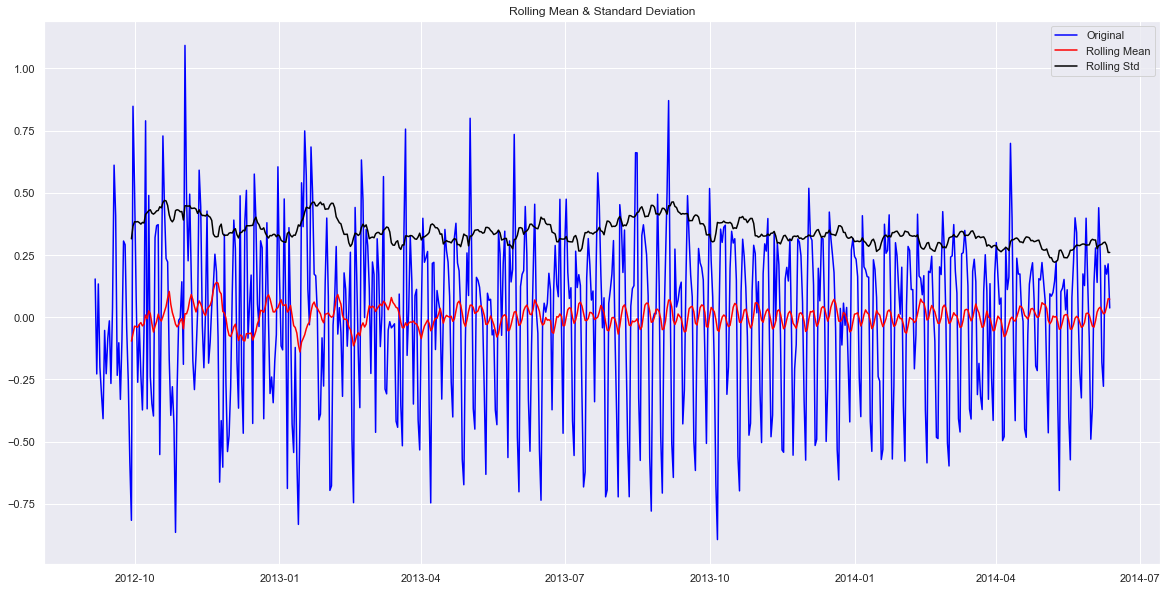

Results of Dickey-Fuller Test:
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [87]:
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['date'] = Train_log.index 
train_log_decompose.set_index('date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])

- It can be interpreted from the results that the residuals are stationary.
- Now we will forecast the time series using different models.

#### Forecasting the time series using ARIMA

- First of all we will fit the ARIMA model on our time series for that we have to find the optimized values for the p,d,q parameters.

- To find the optimized values of these parameters, we will use ACF(Autocorrelation Function) and PACF(Partial Autocorrelation Function) graph.

- ACF is a measure of the correlation between the TimeSeries with a lagged version of itself.

- PACF measures the correlation between the TimeSeries with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons.



In [88]:
# from statsmodels.tsa.stattools import acf, pacf 
lag_acf = acf(train_log_diff.dropna(), nlags=25) 
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

#### ACF and PACF plot

In [89]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [90]:
Train.Count

Datetime
2012-08-25      3.166667
2012-08-26      3.666667
2012-08-27      2.583333
2012-08-28      2.416667
2012-08-29      2.500000
                 ...    
2014-06-20    379.916667
2014-06-21    220.083333
2014-06-22    230.833333
2014-06-23    419.416667
2014-06-24    372.166667
Freq: D, Name: Count, Length: 669, dtype: float64

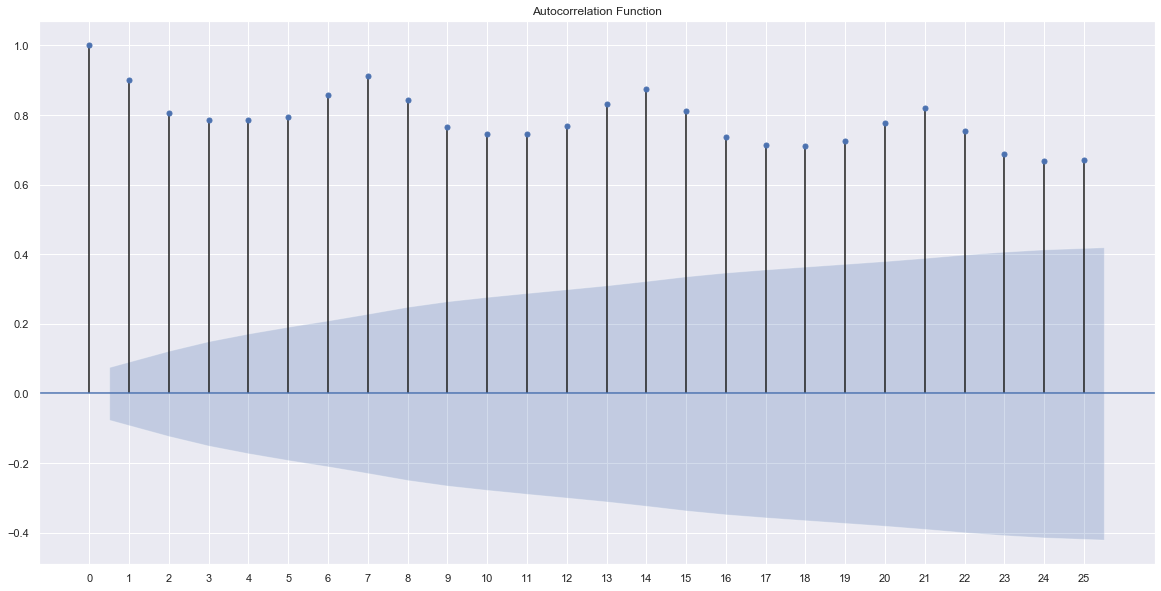

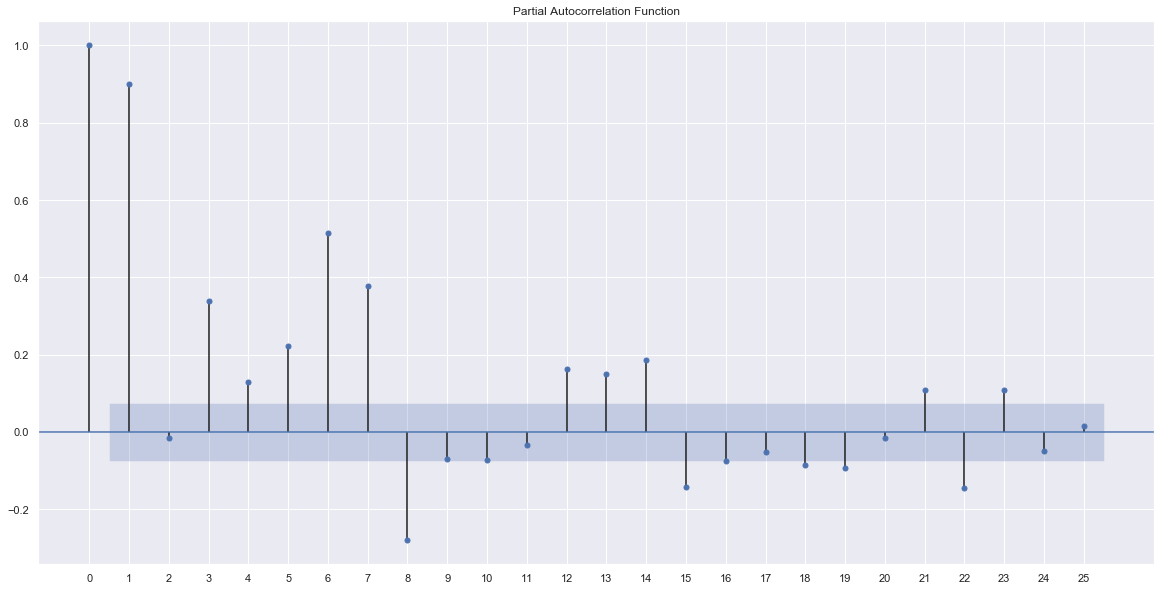

In [91]:
plot_acf(Train.Count, lags=25);
plt.xticks(np.arange(0, len(lag_acf), 1));
plt.title('Autocorrelation Function'); 

plot_pacf(Train.Count, lags=25);
plt.xticks(np.arange(0, len(lag_pacf), 1));
plt.title('Partial Autocorrelation Function'); 



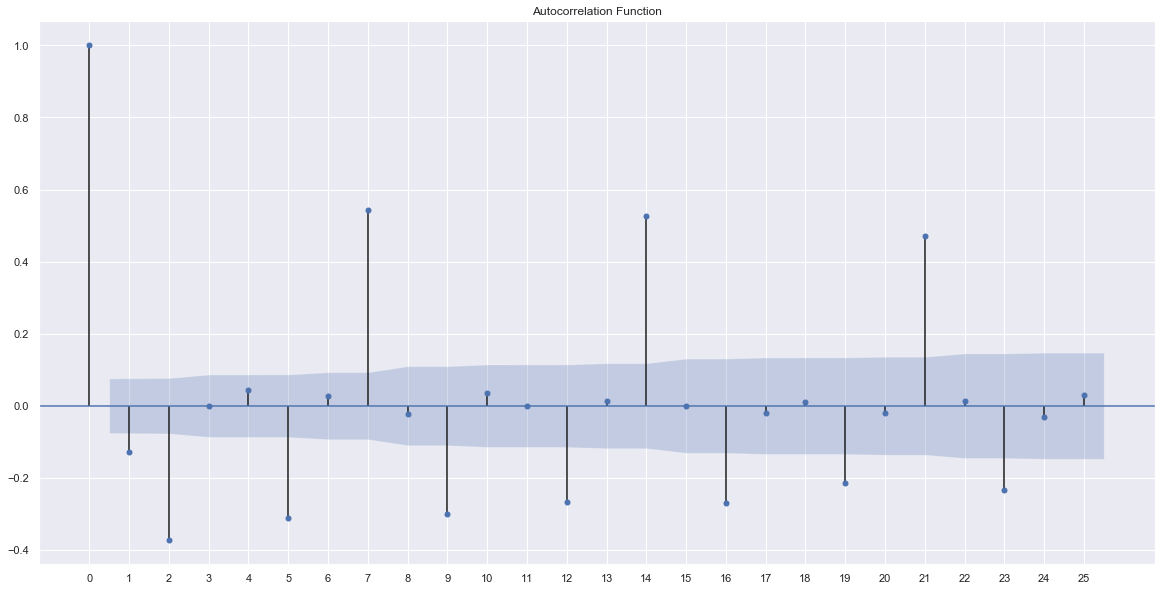

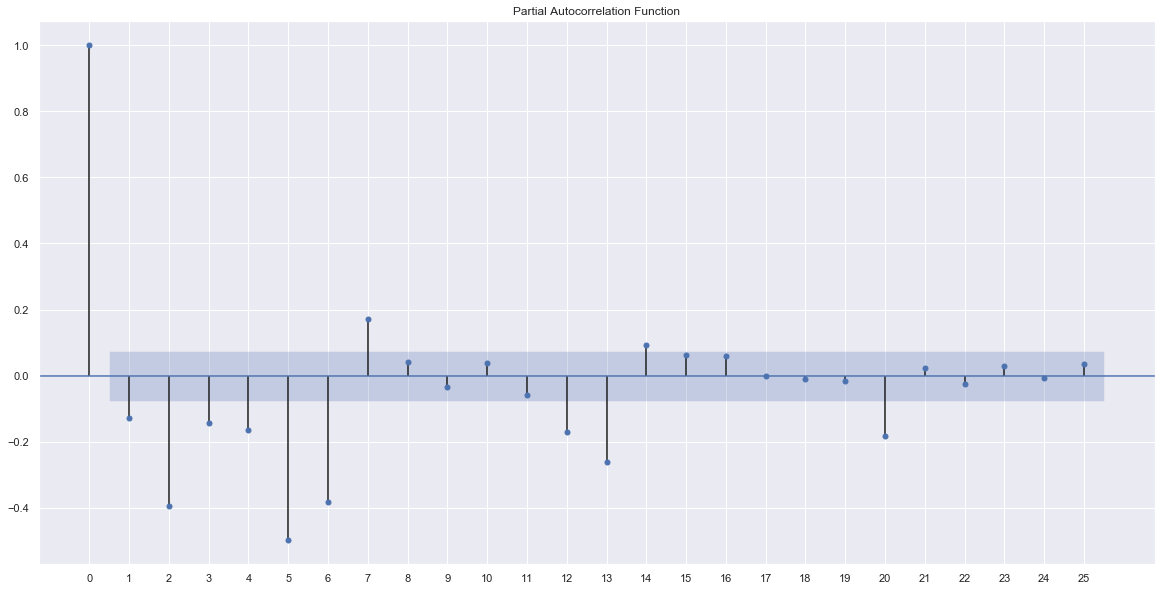

In [92]:
plot_acf(train_log_diff.dropna(), lags=25);
plt.xticks(np.arange(0, len(lag_acf), 1));
plt.title('Autocorrelation Function'); 

plot_pacf(train_log_diff.dropna(), lags=25);
plt.xticks(np.arange(0, len(lag_pacf), 1));
plt.title('Partial Autocorrelation Function'); 

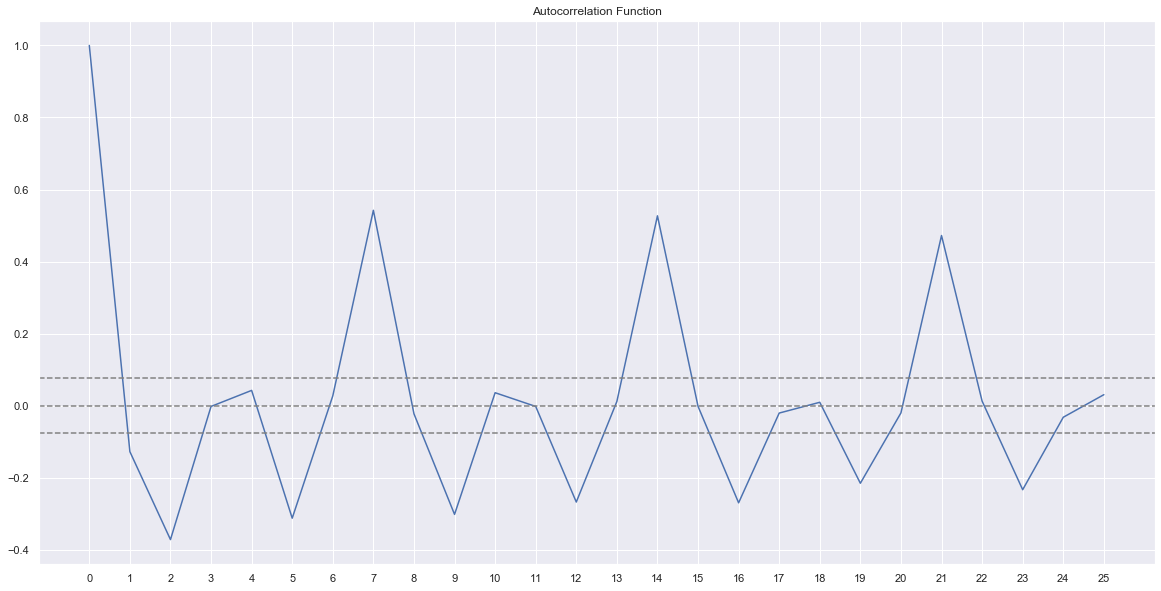

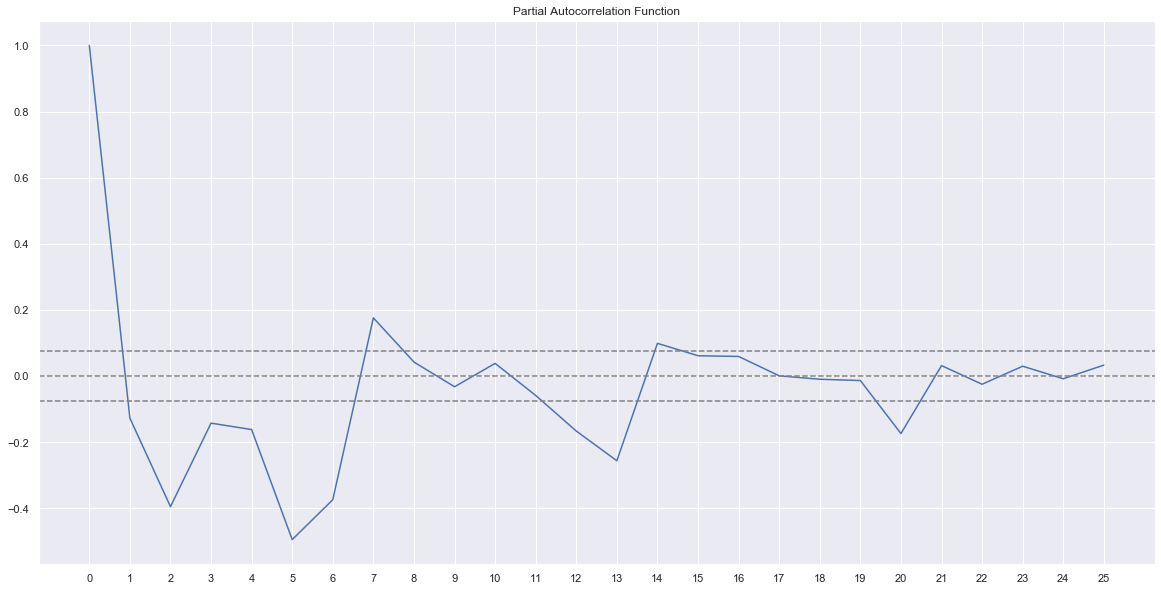

In [93]:
plt.figure(figsize=(20,10));
plt.plot(lag_acf);
plt.axhline(y=0,linestyle='--',color='gray');
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray');
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray');
plt.xticks(np.arange(0, len(lag_acf), 1));
plt.title('Autocorrelation Function');

plt.figure(figsize=(20,10));
plt.plot(lag_pacf); 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray'); 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray');
plt.xticks(np.arange(0, len(lag_pacf), 1));
plt.title('Partial Autocorrelation Function');

- p value is the lag value where the PACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case p=1.
- q value is the lag value where the ACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case q=1.

Now we will make the ARIMA model as we have the p,q values. We will make the AR and MA model separately and then combine them together.

#### AR model

The autoregressive model specifies that the output variable depends linearly on its own previous values.

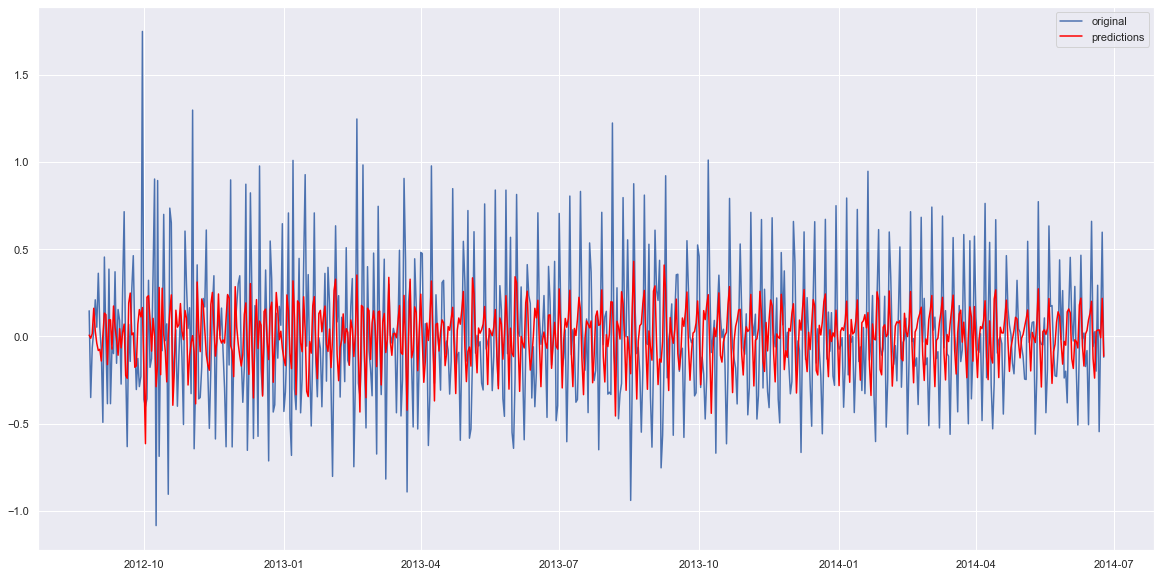

In [94]:
# from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Train_log, order=(2, 1, 0))  # here the q value is zero since it is just the AR model 
results_AR = model.fit(disp=-1) 

plt.figure(figsize=(20,10));
plt.plot(train_log_diff.dropna(), label='original');
plt.plot(results_AR.fittedvalues, color='red', label='predictions');
plt.legend(loc='best'); 

Lets plot the validation curve for AR model.

We have to change the scale of the model to the original scale.

First step would be to store the predicted results as a separate series and observe it.

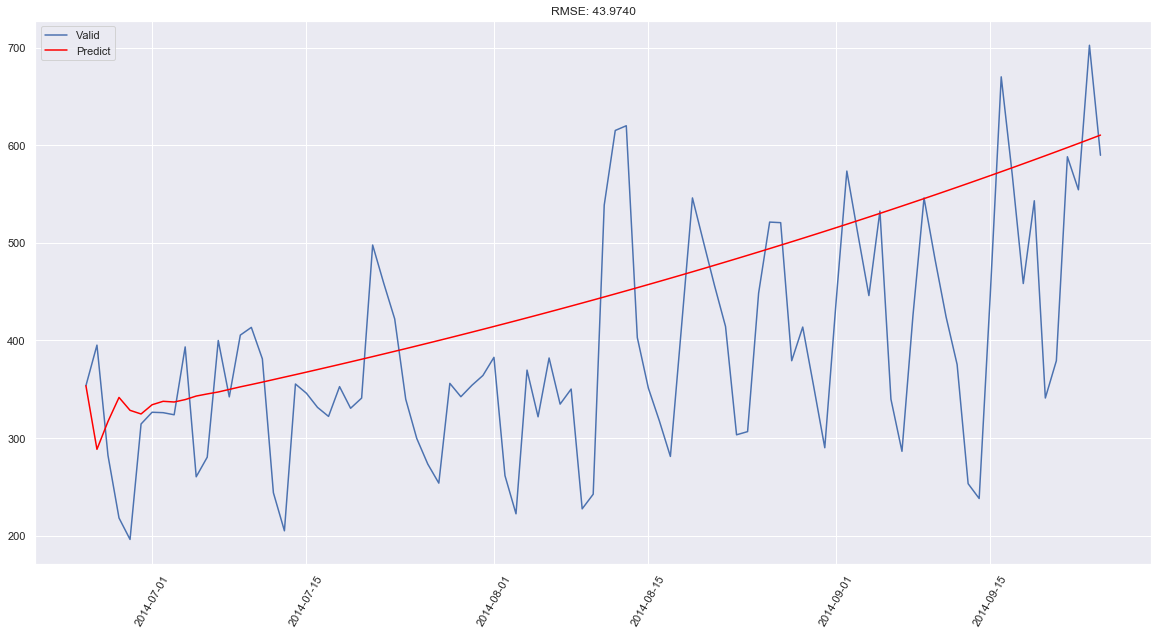

In [95]:
AR_predict=results_AR.predict(start="2014-06-25", end="2014-09-25") 
AR_predict=AR_predict.cumsum().shift().fillna(0) 
AR_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index) 
AR_predict1=AR_predict1.add(AR_predict,fill_value=0) 
AR_predict = np.exp(AR_predict1)

plt.figure(figsize=(20,10));
plt.plot(valid['Count'], label = "Valid"); 
plt.plot(AR_predict, color = 'red', label = "Predict"); 
plt.legend(loc= 'best'); 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Count']))/valid.shape[0]));
plt.xticks(rotation=60);

Here the red line shows the prediction for the validation set. Let’s build the MA model now.

#### MA model

The moving-average model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.

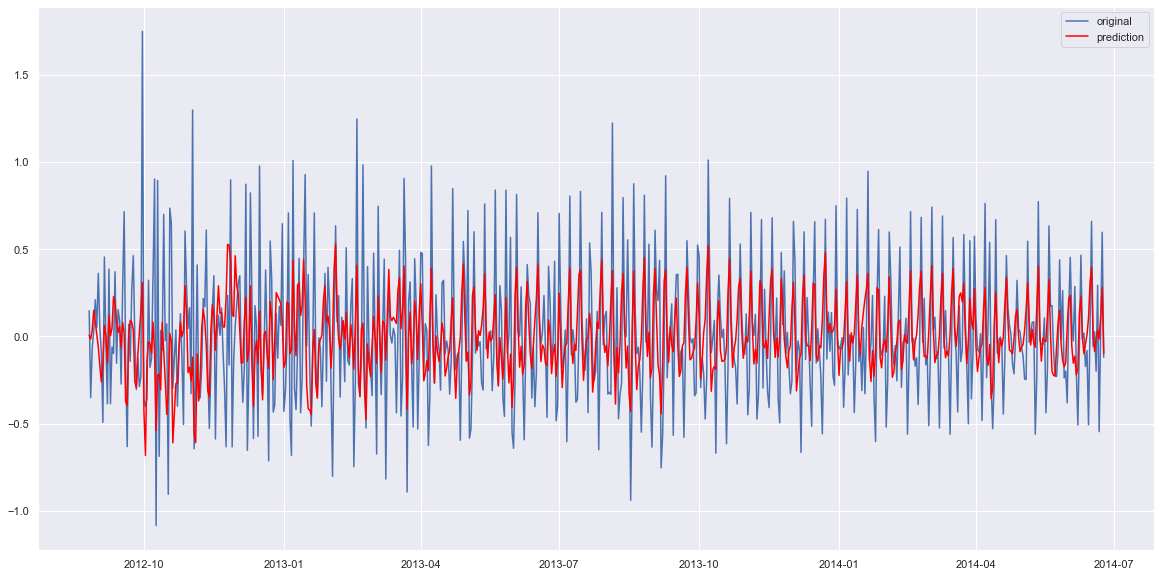

In [96]:
model = ARIMA(Train_log, order=(0, 1, 2))  # here the p value is zero since it is just the MA model 
results_MA = model.fit(disp=-1) 

plt.figure(figsize=(20,10));
plt.plot(train_log_diff.dropna(), label='original'); 
plt.plot(results_MA.fittedvalues, color='red', label='prediction'); 
plt.legend(loc='best'); 

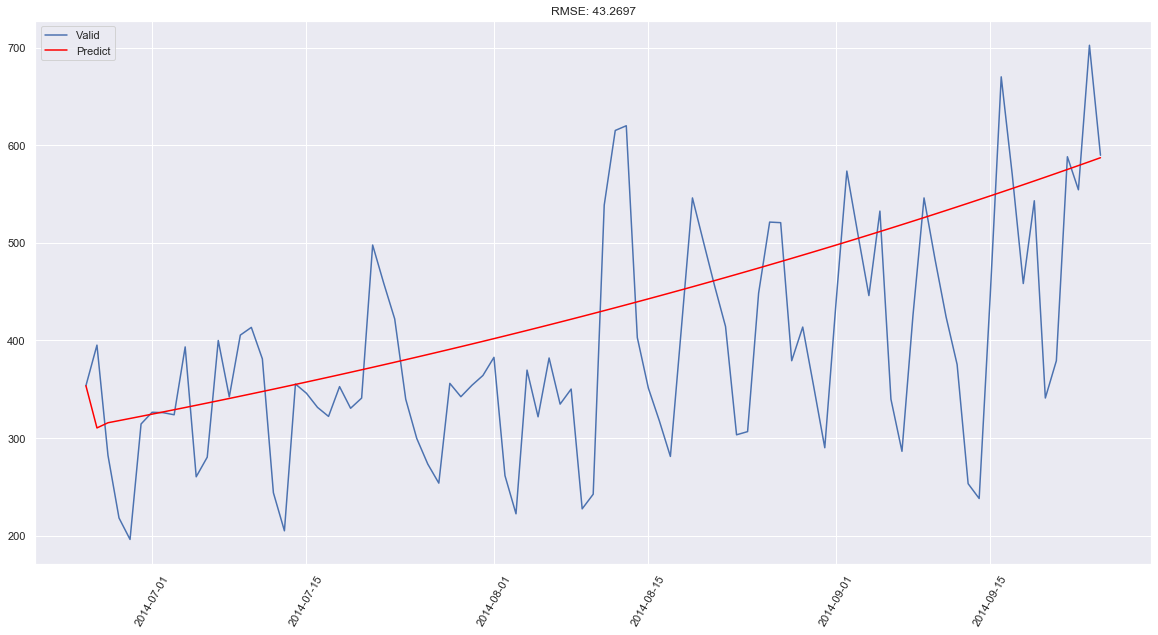

In [97]:
MA_predict = results_MA.predict(start="2014-06-25", end="2014-09-25") 
MA_predict = MA_predict.cumsum().shift().fillna(0) 
MA_predict1 = pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index) 
MA_predict1 = MA_predict1.add(MA_predict,fill_value=0) 
MA_predict = np.exp(MA_predict1)

plt.figure(figsize=(20,10));
plt.plot(valid['Count'], label="Valid"); 
plt.plot(MA_predict, color='red', label="Predict");
plt.legend(loc='best'); 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['Count']))/valid.shape[0]));
plt.xticks(rotation=60);

Now let’s combine these two models.

#### Combined model

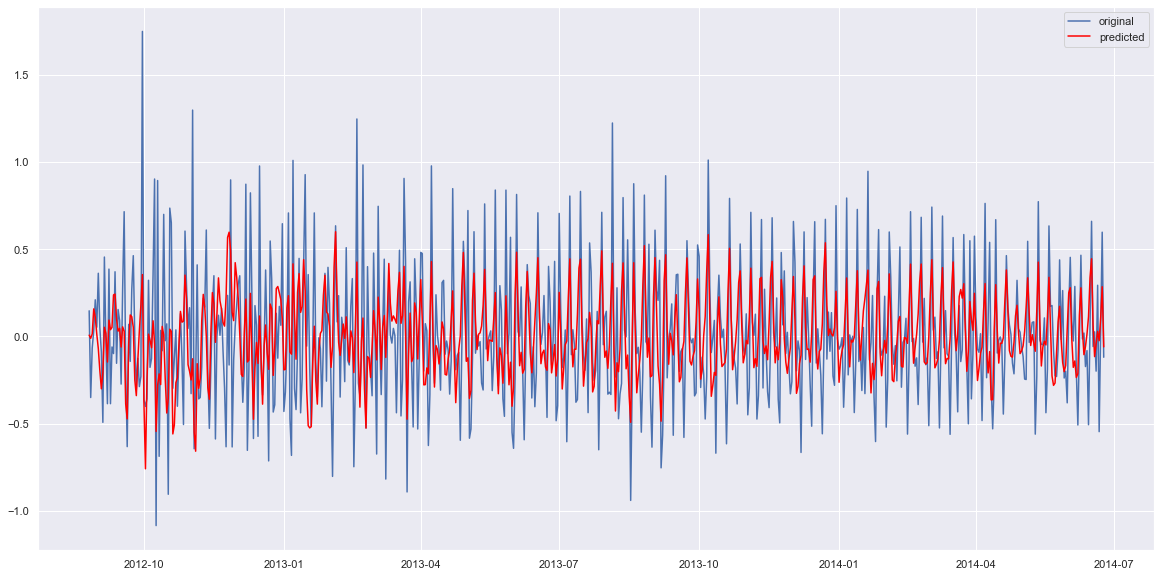

In [98]:
model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1) 

plt.figure(figsize=(20,10));
plt.plot(train_log_diff.dropna(),  label='original'); 
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted'); 
plt.legend(loc='best');

Let’s define a function which can be used to change the scale of the model to the original scale.

In [99]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)

    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

In [100]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.figure(figsize=(20,10))
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

Let’s predict the values for validation set.

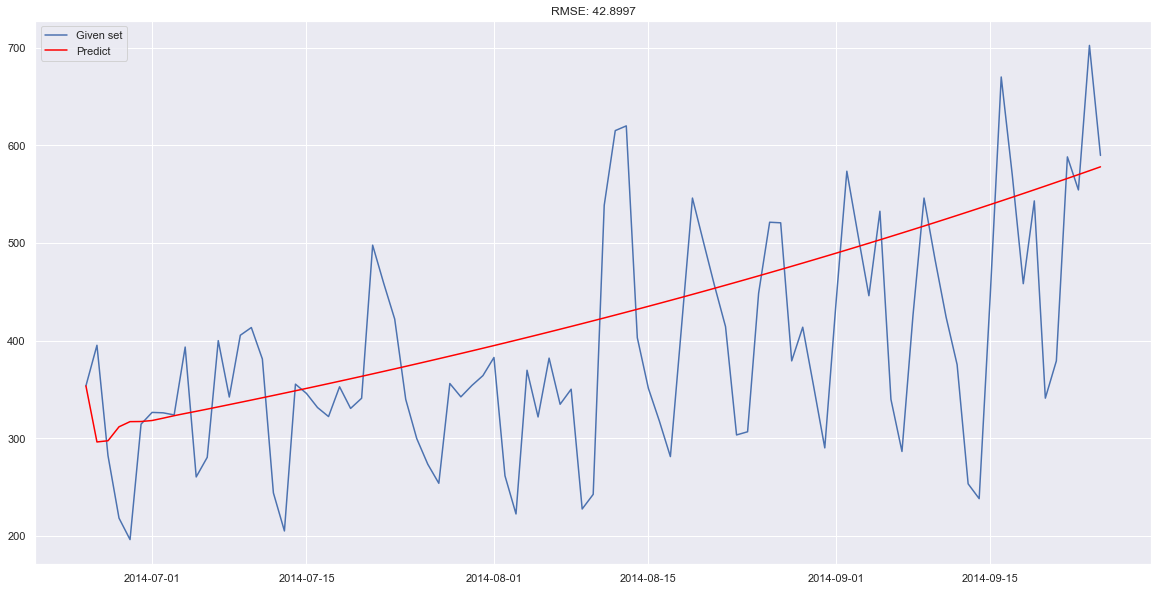

In [101]:
ARIMA_predict_diff = results_ARIMA.predict(start='2014-06-25', end='2014-09-25')

check_prediction_diff(ARIMA_predict_diff, valid)

## SARIMAX model on daily time series

SARIMAX model takes into account the seasonality of the time series. So we will build a SARIMAX model on the time series.

/Users/jasminaglisovic/anaconda3/envs/dsc_timeseries_env/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


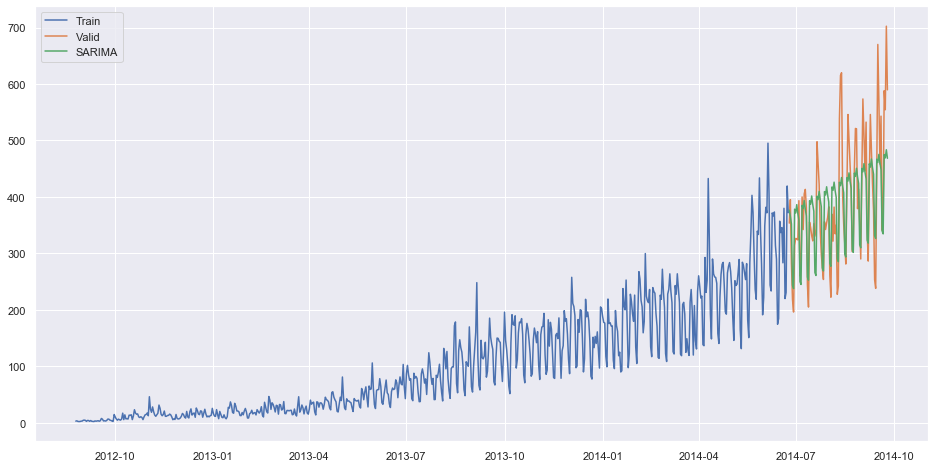

In [102]:
# import statsmodels.api as sm
y_hat_avg = valid.copy() 
fit1 = sm.tsa.statespace.SARIMAX(Train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit() 
y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-25", end="2014-9-25", dynamic=True) 

plt.figure(figsize=(16,8));
plt.plot( Train['Count'], label='Train'); 
plt.plot(valid['Count'], label='Valid'); 
plt.plot(y_hat_avg['SARIMA'], label='SARIMA'); 
plt.legend(loc='best'); 

- Order in the above model represents the order of the autoregressive model (number of time lags), the degree of differencing (number of times the data have had past values subtracted) and the order of moving average model.

- Seasonal order represents the order of the seasonal component of the model for the AR parameters, differences, MA parameters, and periodicity.

- In our case the periodicity is 7 since it is daily time series and will repeat after every 7 days.

Let’s check the rmse value for the validation part.

In [103]:
rmse = np.round(sqrt(mean_squared_error(valid.Count, y_hat_avg.SARIMA)), 2)
print(rmse)

69.48


Now we will forecast the time series for Test data which starts from 2014-9-26 and ends at 2015-4-26.

In [104]:
predict = fit1.predict(start='2014-9-26', end='2015-4-26', dynamic=True)

/Users/jasminaglisovic/anaconda3/envs/dsc_timeseries_env/lib/python3.7/site-packages/statsmodels/tsa/statespace/kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


Note that these are the daily predictions and we need hourly predictions. So, we will distribute this daily prediction into hourly counts. To do so, we will take the ratio of hourly distribution of passenger count from train data and then we will distribute the predictions in the same ratio.

In [105]:
test['prediction']=predict

In [106]:
# Merge Test and test_original on day, month and year 
merge = pd.merge(test, test_original, on=('day','month', 'year'), how='left') 
merge['Hour'] = merge['Hour_y'] 
merge = merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1) 

In [107]:
# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left') 

In [108]:
# Converting the ratio to the original scale 
prediction['Count']=prediction['prediction']*prediction['ratio']*24

Let’s drop all variables other than ID and Count

In [109]:
prediction['ID']=prediction['ID_y'] 
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1) 

In [110]:
# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('SARIMAX.csv')